In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [128]:
def get_image():
    top, bot, right, left = 0, 240, 400, 640

    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()

    roi = frame[top:bot, right:left]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    cap.release()
    return roi

def filter_roi(roi):
    # roi = cv2.GaussianBlur(roi, (3, 3), 0)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    return roi

10
9
8


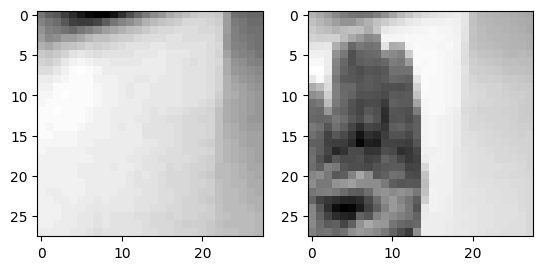

In [132]:
background = filter_roi(get_image())

for i in range(3):
    time.sleep(1)
    print(10-i)

image = filter_roi(get_image())

plt.subplot(1, 2, 1)
plt.imshow(background, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')

plt.show()

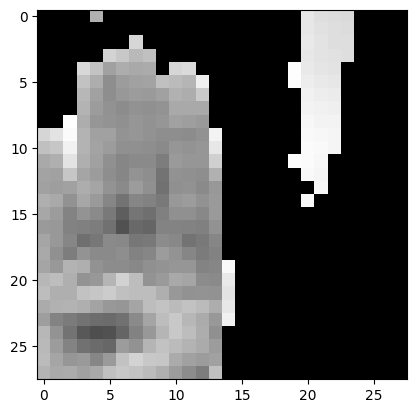

In [133]:
mask = np.isclose(background[:, :], image[:, :], atol=10)

image[mask] = 0

plt.imshow(image, cmap='gray')